In [ ]:
"""
Visualization of speaker statistics

"""

In [1]:
import re, itertools
import networkx as nx

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/katiehuang/Desktop/metis/projects/onl_ds5_project_4/py')
from word_cloud import *
import importlib

In [2]:
# Load data
speaker_info = pd.read_pickle('../dump/speaker_info_allp')
speech_df = pd.read_pickle('../dump/speech_df')

In [3]:
# Drop speaker if there's missing values
speaker_info_cut = speaker_info.dropna()
speaker_info_cut.shape

(331, 5)

## 1. Categorize professions

In [4]:
# List speaker professions
professions = speaker_info_cut.profession.tolist()
professions = [profession.lower() for profession in professions]
len(professions),
# professions

(331,)

In [5]:
# Categorize speaker professions

category =[]

publish = ['novelist','writer','author','cartoonist','poet','journalist',
           'illustrator','comic','memoirist']
med_law = ['physician','surgeon','psychologist','neurosurgeon','lawyer','gynecologist','judge']
entertainment = ['humorist','filmmaker','actress','actor','host','comedian',
                 'director','songwriter','commentator','screenwriter','producer',
                 'podcaster','personality','designer','broadcaster',
                 'playwright','animator',]
art = ['artist','musician','composer','trumpeter','mezzo-soprano']
sport = ['player','soccer','basketball','sportscaster','baseball','coach','skier',
         'nfl','sports announcer','rower','tennis','football']
tech_business = ['entrepreneur','executive','chief','ceo','senior vice president',
                 'businesswoman','businessman','business','boeing','philanthropist']
science = ['astrophysicist','astronaut','biologist','scientist','science']
education_research = ['researcher','economist','educator','university',
                      'environmentalist','philosopher','professor']
politics = ['police','senator','businessperson','first lady','united states',
            'admiral','presidential','governor','political','mayor','legislative',
            'u.s. president','navy','officer','official','president of ireland',]
other = ['spiritual']

categories = [publish, publish, med_law ,entertainment, sport, tech_business,
              science, politics, education_research, other]

for profession in professions:
    if any(x in profession for x in publish):
        category.append('Publish')
    elif any(x in profession for x in med_law):
        category.append('Med/Law')
    elif any(x in profession for x in entertainment):
        category.append('Entertainment')
    elif any(x in profession for x in art):
        category.append('Art')
    elif any(x in profession for x in sport):
        category.append('Sport')
    elif any(x in profession for x in tech_business):
        category.append('Tech/Business')
    elif any(x in profession for x in science):
        category.append('Science')
    elif any(x in profession for x in politics):
        category.append('Politics')
    elif any(x in profession for x in education_research):
        category.append('Education/Research')
    else:
        category.append('Other')

In [6]:
len(category)

331

In [7]:
speaker_info_cut['category'] = category

<ipython-input-7-19fd57d171fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speaker_info_cut['category'] = category


In [8]:
speaker_info_cut

,speaker,profession,born,age,origin,category
0,SIDDHARTHA MUKHERJEE,American-Indian physician,1970,50,New Delhi India,Med/Law
1,JESMYN WARD,American novelist,1977,43,De Lisle MS,Publish
2,DAVID SEDARIS,American humorist,1956,64,Johnson City NY,Entertainment
3,NIGHT SHYAMALAN,American-Indian filmmaker,1970,50,Mahé India,Entertainment
4,TERRY TEACHOUT,American author,1956,65,Cape Girardeau MO,Publish
...,...,...,...,...,...,...
410,MARGARET ATWOOD,Canadian poet,1939,81,Ottawa Canada,Publish
414,MERYL STREEP,American actress,1949,71,Summit NJ,Entertainment
417,ALAN ALDA,American actor,1936,85,New York NY,Entertainment
438,OPRAH WINFREY,American host,1954,67,Kosciusko MS,Entertainment


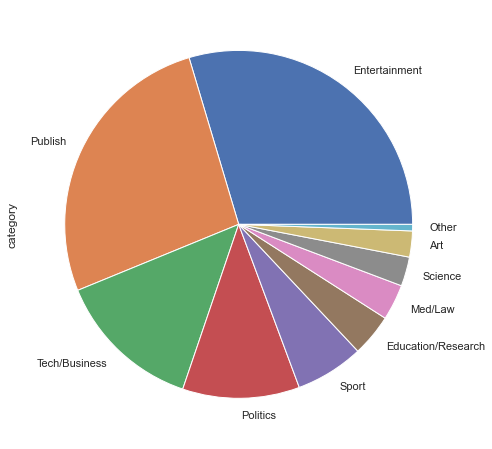

In [9]:
plt.rcParams['figure.figsize'] = [20, 8]
speaker_info_cut.category.value_counts().plot(kind='pie');

In [10]:
speaker_info_cut[speaker_info_cut.category == "Other"]

,speaker,profession,born,age,origin,category
126,DALAI LAMA,spiritual leader,1935,85,Taktser China,Other
294,JOHN DOERR,American investor,1951,69,St. Louis MO,Other


## 2. Statistics on speakers' age

### A. Clean up the merged df

In [11]:
# Left join speech_df on speaker_info_cut
df = pd.merge(speaker_info_cut,speech_df,on='speaker',how='left')
df.drop_duplicates(subset=['speaker','school','year'],inplace=True)
df.shape

(331, 10)

In [12]:
# Fill values in born and change type to integer
df['age'] = df['age'].astype(int)

df['born'] = df['age'].apply(lambda x: 2020 - x)
df['born'] = df['born'].astype(int)

In [13]:
# Create column for age of speaker when giving the speech
df['age_then'] = df['year'] - df['born']

In [14]:
df.reset_index(drop=True,inplace=True)

#### Examin and update weird entry

In [15]:
df.sort_values('age_then')

,speaker,profession,born,age,origin,category,year,school,transcript,length,age_then
330,GARRISON KEILLOR,American author,1942,78,Anoka MN,Publish,0,,\n It's an honor to be with so many smart peo...,8063,-1942
24,OPRAH WINFREY,American host,1953,67,Kosciusko MS,Entertainment,1918,USC,Thank you Wallis Annenberg and a special thank...,15301,-35
100,ANNE MARIE,Singer-songwriter,1991,29,East Tilbury United Kingdom,Publish,2014,SLAUGHTER TUFTS UNIVERSITY,Oh happy day! To all the members of the gradua...,9154,23
137,WADE DAVIS,Baseball pitcher,1985,35,Lake Wales FL,Sport,2010,COLORADO COLLEGE,"President Celeste and Jacqueline. Trustees, Al...",18147,25
146,RONAN FARROW,American journalist,1987,33,New York NY,Publish,2012,DOMINICAN UNIVERSITY OF CALIFORNIA,"Thank you for that introduction, President Mar...",13397,25
...,...,...,...,...,...,...,...,...,...,...,...
300,JEAN ANDREWS,"Tech, educator",1923,97,Born: December 23 1923 (age 97 years),Education/Research,2003,"UNIVERSITY OF TEXAS, AUSTIN","Dean Rankin, members of the faculty, graduatin...",8688,80
45,WILLIAM FOEGE,American author,1936,84,Decorah IA,Publish,2016,Emory University,And that is why we have commencement talks. ...,15294,80
301,JEAN ANDREWS,"Tech, educator",1923,97,Born: December 23 1923 (age 97 years),Education/Research,2003,University of Texas at Austin,\nWhen Dean Rankin invited me to present the c...,8675,80
75,GLORIA STEINEM,American journalist,1934,86,Toledo OH,Publish,2015,Bennington College,If it looks like a duck and walks like a duc...,22055,81


In [16]:
# Correct wrong year
df.iloc[330,6] = 2016  # GARRISON KEILLOR
df.iloc[24,6] = 2018  # OPRAH WINFREY USC

# And update age_then
df['age_then'] = df['year'] - df['born']

#### Plot

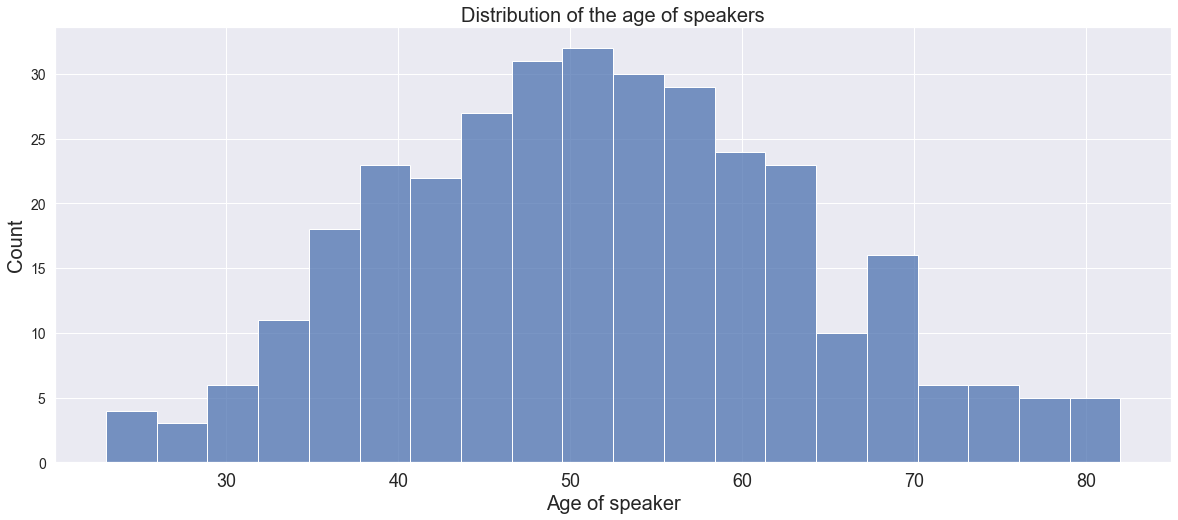

In [17]:
# Histogram
plt.rcParams['figure.figsize'] = [20, 8]
fig, ax = plt.subplots()
sns.histplot(df.age_then,bins=20)
ax.set_title("Distribution of the age of speakers",fontsize=20)
ax.set_ylabel('Count',fontsize=20)
ax.set_xlabel("Age of speaker",fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14);

In [18]:
df

,speaker,profession,born,age,origin,category,year,school,transcript,length,age_then
0,SIDDHARTHA MUKHERJEE,American-Indian physician,1970,50,New Delhi India,Med/Law,2018,Univ. of Southern California,I wish someone had told me at my own commenc...,14487,48
1,JESMYN WARD,American novelist,1977,43,De Lisle MS,Publish,2018,Tulane University,Persist. Be patient. Be well. Good morning....,14063,41
2,DAVID SEDARIS,American humorist,1956,64,Johnson City NY,Entertainment,2018,OBERLIN COLLEGE,"Thank you so much for having me, and for prese...",10587,62
3,NIGHT SHYAMALAN,American-Indian filmmaker,1970,50,Mahé India,Entertainment,2018,DREXEL UNIVERSITY,\nwhat's up dragons alright let's start\n\nwit...,26406,48
4,TERRY TEACHOUT,American author,1955,65,Cape Girardeau MO,Publish,2018,HAMILTON HOLT SCHOOL,"I’m supposed to keep it short, and I approve o...",6288,63
...,...,...,...,...,...,...,...,...,...,...,...
326,GUIDO CALABRESI,American-Italian judge,1932,88,Milan Italy,Med/Law,1988,CONNECTICUT COLLEGE,It's a particular honor for me to be here at t...,14101,56
327,MEREDITH MONK,American composer,1942,78,New York NY,Art,1985,SARAH LAWRENCE COLLEGE,"President Lichman, members of the faculty, alu...",9255,43
328,MARGARET ATWOOD,Canadian poet,1939,81,Ottawa Canada,Publish,1983,UNIVERSITY OF TORONTO,I am of course overjoyed to be here today in t...,11588,44
329,ALAN ALDA,American actor,1935,85,New York NY,Entertainment,1980,CONNECTICUT COLLEGE,I'm here today for a very special reason.\n\nW...,18161,45


In [19]:
# Pickle
df.to_pickle('../dump/speech_df_speaker')